## Predicitive Maintenance based on Building telemetry system

### The following notebook illustrates application of ML/AI principles in building telemetry system predictive maintenance applications

Dataset information
Machine conditions and usage: The operating conditions of a machine e.g. data collected from sensors.
Failure history: The failure history of a machine or component within the machine.
Maintenance history: The repair history of a machine, e.g. error codes, previous maintenance activities or component replacements.
Machine features: The features of a machine, e.g. engine size, make and model, location.





In [ ]:
!unzip telemetry.zip

Archive:  telemetry.zip
   creating: telemetry/
  inflating: telemetry/PdM_errors.csv  
  inflating: telemetry/PdM_failures.csv  
  inflating: telemetry/PdM_machines.csv  
  inflating: telemetry/PdM_maint.csv  
  inflating: telemetry/PdM_telemetry.csv  
 extracting: telemetry/telemetry.zip  


In [ ]:
!ls telemetry

PdM_errors.csv	  PdM_machines.csv  PdM_telemetry.csv
PdM_failures.csv  PdM_maint.csv     telemetry.zip


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the data
PdM_error= "telemetry/PdM_errors.csv"
PdM_failure= "telemetry/PdM_failures.csv"
PdM_maint= "telemetry/PdM_maint.csv"
PdM_telemetry= "telemetry/PdM_telemetry.csv"
PdM_Machines= "telemetry/PdM_machines.csv"
PdM_error = pd.read_csv(PdM_error)
PdM_failure= pd.read_csv(PdM_failure)
PdM_maint= pd.read_csv(PdM_maint)
PdM_telemetry = pd.read_csv(PdM_telemetry)
PdM_Machines = pd.read_csv(PdM_Machines)

In [ ]:
display(PdM_error)

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4
...,...,...,...
3914,2015-11-21 08:00:00,100,error2
3915,2015-12-04 02:00:00,100,error1
3916,2015-12-08 06:00:00,100,error2
3917,2015-12-08 06:00:00,100,error3


import numpy as np
from google.colab import autoviz
df_1231901795821932314 = autoviz.get_registered_df('df_1231901795821932314')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1231901795821932314, *['machineID'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1932605274764191982 = autoviz.get_registered_df('df_1932605274764191982')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1932605274764191982, *['machineID'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4759857178673696849 = autoviz.get_registered_df('df_4759857178673696849')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_4759857178673696849, *['errorID'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6925544521504790824 = autoviz.get_registered_df('df_6925544521504790824')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_6925544521504790824, *['machineID', 'errorID'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz
df_5098074009858535244 = autoviz.get_registered_df('df_5098074009858535244')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5098074009858535244, *['datetime', 'count()', 'errorID'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5920068334179375649 = autoviz.get_registered_df('df_5920068334179375649')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5920068334179375649, *['machineID', 'count()', 'errorID'], **{})
chart

In [ ]:
display(PdM_failure)

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4
...,...,...,...
756,2015-11-29 06:00:00,99,comp3
757,2015-12-14 06:00:00,99,comp4
758,2015-02-12 06:00:00,100,comp1
759,2015-09-10 06:00:00,100,comp1


import numpy as np
from google.colab import autoviz
df_6828517013958338271 = autoviz.get_registered_df('df_6828517013958338271')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6828517013958338271, *['machineID'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7010054299607257155 = autoviz.get_registered_df('df_7010054299607257155')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7010054299607257155, *['machineID'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7916717929348673700 = autoviz.get_registered_df('df_7916717929348673700')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_7916717929348673700, *['failure'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7915657471454739486 = autoviz.get_registered_df('df_7915657471454739486')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_7915657471454739486, *['machineID', 'failure'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz
df_6492024499057136079 = autoviz.get_registered_df('df_6492024499057136079')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6492024499057136079, *['datetime', 'count()', 'failure'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8471536330124383170 = autoviz.get_registered_df('df_8471536330124383170')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_8471536330124383170, *['machineID', 'count()', 'failure'], **{})
chart

In [ ]:
display(PdM_telemetry)

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511
...,...,...,...,...,...,...
876095,2016-01-01 02:00:00,100,179.438162,395.222827,102.290715,50.771941
876096,2016-01-01 03:00:00,100,189.617555,446.207972,98.180607,35.123072
876097,2016-01-01 04:00:00,100,192.483414,447.816524,94.132837,48.314561
876098,2016-01-01 05:00:00,100,165.475310,413.771670,104.081073,44.835259


import numpy as np
from google.colab import autoviz
df_2485957065370886529 = autoviz.get_registered_df('df_2485957065370886529')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2485957065370886529, *['machineID'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4942776343894847881 = autoviz.get_registered_df('df_4942776343894847881')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4942776343894847881, *['volt'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2904005997095197112 = autoviz.get_registered_df('df_2904005997095197112')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2904005997095197112, *['rotate'], **{})
chart

import numpy as np
from google.colab import autoviz
df_624738469111555063 = autoviz.get_registered_df('df_624738469111555063')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_624738469111555063, *['pressure'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8927926704417816632 = autoviz.get_registered_df('df_8927926704417816632')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8927926704417816632, *['machineID'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5951214341661786826 = autoviz.get_registered_df('df_5951214341661786826')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5951214341661786826, *['volt'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4252988707244833943 = autoviz.get_registered_df('df_4252988707244833943')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4252988707244833943, *['rotate'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7369489319947272149 = autoviz.get_registered_df('df_7369489319947272149')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7369489319947272149, *['pressure'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4532806766502610234 = autoviz.get_registered_df('df_4532806766502610234')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_4532806766502610234, *[[['machineID', 'volt'], ['volt', 'rotate'], ['rotate', 'pressure'], ['pressure', 'vibration']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_6839846038551124399 = autoviz.get_registered_df('df_6839846038551124399')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6839846038551124399, *['datetime', 'volt', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_4538485666029905068 = autoviz.get_registered_df('df_4538485666029905068')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4538485666029905068, *['datetime', 'rotate', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_5301540540375258931 = autoviz.get_registered_df('df_5301540540375258931')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5301540540375258931, *['datetime', 'pressure', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_2518944537897957508 = autoviz.get_registered_df('df_2518944537897957508')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_2518944537897957508, *['datetime', 'vibration', None], **{})
chart

In [ ]:
display(PdM_Machines)

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2
...,...,...,...
95,96,model2,10
96,97,model2,14
97,98,model2,20
98,99,model1,14


import numpy as np
from google.colab import autoviz
df_7322212563813930222 = autoviz.get_registered_df('df_7322212563813930222')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7322212563813930222, *['machineID'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7322212563813930222 = autoviz.get_registered_df('df_7322212563813930222')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7322212563813930222, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7322212563813930222 = autoviz.get_registered_df('df_7322212563813930222')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7322212563813930222, *['machineID'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7322212563813930222 = autoviz.get_registered_df('df_7322212563813930222')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7322212563813930222, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7322212563813930222 = autoviz.get_registered_df('df_7322212563813930222')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_7322212563813930222, *['model'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7322212563813930222 = autoviz.get_registered_df('df_7322212563813930222')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_7322212563813930222, *[[['machineID', 'age']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_7322212563813930222 = autoviz.get_registered_df('df_7322212563813930222')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_7322212563813930222, *['machineID', 'model'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_7322212563813930222 = autoviz.get_registered_df('df_7322212563813930222')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_7322212563813930222, *['age', 'model'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_7322212563813930222 = autoviz.get_registered_df('df_7322212563813930222')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_7322212563813930222, *['machineID', 'age', 'model'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7322212563813930222 = autoviz.get_registered_df('df_7322212563813930222')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_7322212563813930222, *['machineID', 'count()', 'model'], **{})
chart

In [ ]:
PdM_telemetry['datetime'] = pd.to_datetime(PdM_telemetry['datetime'], format="%Y-%m-%d %H:%M:%S")
PdM_error['datetime'] = pd.to_datetime(PdM_error['datetime'], format="%Y-%m-%d %H:%M:%S")
PdM_failure['datetime'] = pd.to_datetime(PdM_failure['datetime'], format="%Y-%m-%d %H:%M:%S")
PdM_maint['datetime'] = pd.to_datetime(PdM_maint['datetime'], format="%Y-%m-%d %H:%M:%S")

merged_data = pd.merge(PdM_telemetry, PdM_error, on=['datetime', 'machineID'], how='outer')
merged_data = pd.merge(merged_data, PdM_failure, on=['datetime', 'machineID'], how='outer')
merged_data = pd.merge(merged_data, PdM_maint, on=['datetime', 'machineID'], how='outer')
merged_data = pd.merge(merged_data, PdM_Machines, on='machineID', how='outer')

In [ ]:
#print length of all datasets
print(f"length of PdM_telemetry is {len(PdM_telemetry)}")
print(f"length of PdM_error is {len(PdM_error)}")
print(f"length of PdM_failure is {len(PdM_failure)}")
print(f"length of PdM_maint is {len(PdM_maint)}")
print(f"length of PdM_Machines is {len(PdM_Machines)}")
print(merged_data.head(30))
#print date is 2015-01-05 06:00:00
print(merged_data[merged_data['datetime'] == '2015-01-05 06:00:00'])
# Proportion of missing values in each column
missing_proportions = merged_data.isna().sum() / len(merged_data)

print(f"Proportion of missing values in each column:\n{missing_proportions}")

length of PdM_telemetry is 876100
length of PdM_error is 3919
length of PdM_failure is 761
length of PdM_maint is 3286
length of PdM_Machines is 100
              datetime  machineID        volt      rotate    pressure  \
0  2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1  2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2  2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3  2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4  2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   
5  2015-01-01 11:00:00          1  172.504839  430.323362   95.927042   
6  2015-01-01 12:00:00          1  156.556031  499.071623  111.755684   
7  2015-01-01 13:00:00          1  172.522781  409.624717  101.001083   
8  2015-01-01 14:00:00          1  175.324524  398.648781  110.624361   
9  2015-01-01 15:00:00          1  169.218423  460.850670  104.848230   
10 2015-01-01 16:00:00          1  167.060981  3

In [ ]:
#convert nan in failure to NoFailure
merged_data['failure'] = merged_data['failure'].fillna('NoFailure')

#drop errorID and comp
merged_data = merged_data.drop(['errorID', 'comp'], axis=1)
print(merged_data.head(10))






#change datetime colname to timestamp
merged_data.rename(columns={'datetime': 'timestamp'}, inplace=True)

def add_dateparts(X):
    X['year'] = X['timestamp'].dt.year
    X['month'] = X['timestamp'].dt.month
    X['day'] = X['timestamp'].dt.day
    X['hour'] = X['timestamp'].dt.hour
    X['minute'] = X['timestamp'].dt.minute
    X['second'] = X['timestamp'].dt.second
    X['microsecond'] = X['timestamp'].dt.microsecond
    X['nanosecond'] = X['timestamp'].dt.nanosecond
    X['day_of_year'] = X['timestamp'].dt.dayofyear
    X['week_of_year'] = X['timestamp'].dt.isocalendar().week
    X['day_of_week'] = X['timestamp'].dt.dayofweek
    X['weekday'] = X['timestamp'].dt.weekday
    X['quarter'] = X['timestamp'].dt.quarter
    X['is_month_start'] = X['timestamp'].dt.is_month_start
    X['is_month_end'] = X['timestamp'].dt.is_month_end
    X['is_quarter_start'] = X['timestamp'].dt.is_quarter_start
    X['is_quarter_end'] = X['timestamp'].dt.is_quarter_end
    X['is_year_start'] = X['timestamp'].dt.is_year_start
    X['is_year_end'] = X['timestamp'].dt.is_year_end
    X['is_leap_year'] = X['timestamp'].dt.is_leap_year
    X.drop(['timestamp'], axis=1, inplace=True)
    return X

merged_data = add_dateparts(merged_data)
merged_data.head(10)


             datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   
5 2015-01-01 11:00:00          1  172.504839  430.323362   95.927042   
6 2015-01-01 12:00:00          1  156.556031  499.071623  111.755684   
7 2015-01-01 13:00:00          1  172.522781  409.624717  101.001083   
8 2015-01-01 14:00:00          1  175.324524  398.648781  110.624361   
9 2015-01-01 15:00:00          1  169.218423  460.850670  104.848230   

   vibration    failure   model  age  
0  45.087686  NoFailure  model3   18  
1  43.413973  NoFailure  model3   18  
2  34.178847  NoFailure  model3   18  
3  41.122144  NoFailure  model3   18  
4  25.990511

,machineID,volt,rotate,pressure,vibration,failure,model,age,year,month,...,day_of_week,weekday,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_leap_year
0,1,176.217853,418.504078,113.077935,45.087686,NoFailure,model3,18,2015,1,...,3,3,1,True,False,True,False,True,False,False
1,1,162.879223,402.747490,95.460525,43.413973,NoFailure,model3,18,2015,1,...,3,3,1,True,False,True,False,True,False,False
2,1,170.989902,527.349825,75.237905,34.178847,NoFailure,model3,18,2015,1,...,3,3,1,True,False,True,False,True,False,False
3,1,162.462833,346.149335,109.248561,41.122144,NoFailure,model3,18,2015,1,...,3,3,1,True,False,True,False,True,False,False
4,1,157.610021,435.376873,111.886648,25.990511,NoFailure,model3,18,2015,1,...,3,3,1,True,False,True,False,True,False,False
5,1,172.504839,430.323362,95.927042,35.655017,NoFailure,model3,18,2015,1,...,3,3,1,True,False,True,False,True,False,False
6,1,156.556031,499.071623,111.755684,42.753920,NoFailure,model3,18,2015,1,...,3,3,1,True,False,True,False,True,False,False
7,1,172.522781,409.624717,101.001083,35.482009,NoFailure,model3,18,2015,1,...,3,3,1,True,False,True,False,True,False,False
8,1,175.324524,398.648781,110.624361,45.482287,NoFailure,model3,18,2015,1,...,3,3,1,True,False,True,False,True,False,False
9,1,169.218423,460.850670,104.848230,39.901735,NoFailure,model3,18,2015,1,...,3,3,1,True,False,True,False,True,False,False


   machineID        volt      rotate    pressure  vibration  failure   model  \
0          1  176.217853  418.504078  113.077935  45.087686        0  model3   
1          1  162.879223  402.747490   95.460525  43.413973        0  model3   
2          1  170.989902  527.349825   75.237905  34.178847        0  model3   
3          1  162.462833  346.149335  109.248561  41.122144        0  model3   
4          1  157.610021  435.376873  111.886648  25.990511        0  model3   
5          1  172.504839  430.323362   95.927042  35.655017        0  model3   
6          1  156.556031  499.071623  111.755684  42.753920        0  model3   
7          1  172.522781  409.624717  101.001083  35.482009        0  model3   
8          1  175.324524  398.648781  110.624361  45.482287        0  model3   
9          1  169.218423  460.850670  104.848230  39.901735        0  model3   

   age  year  month  ...  day_of_week  weekday  quarter  is_month_start  \
0   18  2015      1  ...            3       

<ipython-input-16-7e91f7d2250f>:42: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_data.corr()


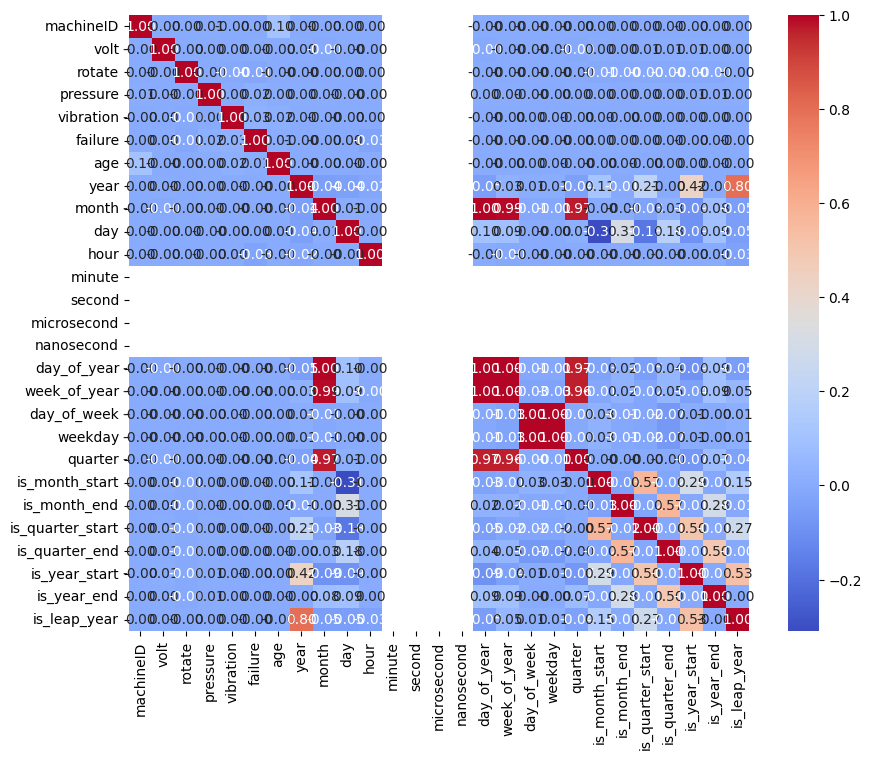

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
def split_data(data, test_size=0.2, random_state=42):
    """
    Splits a pandas DataFrame into train and test sets.

    Parameters:
    data (pd.DataFrame): Input DataFrame to be split.
    test_size (float): Proportion of the data to be used as test data. Default is 0.2 (80% training, 20% test)
    random_state (int): The seed used by the random number generator for reproducible results.

    Returns:
    train (pd.DataFrame): Training data
    test (pd.DataFrame): Test data
    """

    # Define the target variable (in your case, 'failure') and predictors
    X = data.drop(columns='failure')
    y = data['failure']

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test



# Create a label (category) encoder object
le = LabelEncoder()

# Fit and Transform the 'failure' column
merged_data['failure'] = le.fit_transform(merged_data['failure'])

# Display the first 10 rows of the dataframe
print(merged_data.head(10))


import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = merged_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Show the plot
plt.show()


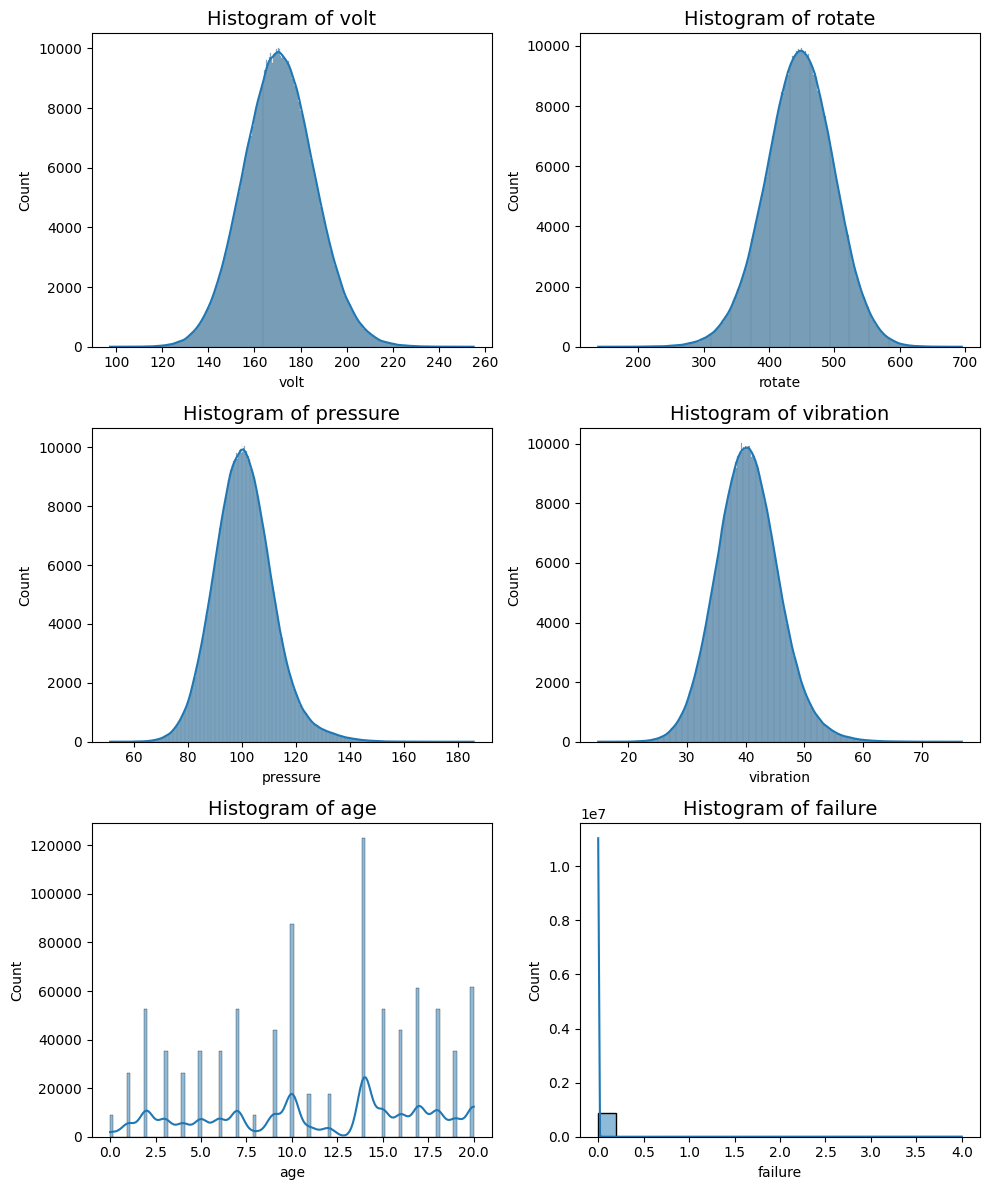

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of all numerical variables
num_vars = ['volt', 'rotate', 'pressure', 'vibration', 'age', 'failure']

n = len(num_vars)
ncols = 2
nrows = n//ncols if n%ncols == 0 else n//ncols + 1

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 4*nrows))
axs = axs.flatten()  # to handle the subplots easily

for i, var in enumerate(num_vars):
    sns.histplot(merged_data[var], kde=True, ax=axs[i])
    axs[i].set_title(f'Histogram of {var}', fontsize=14)

# Remove empty subplots
if n%ncols != 0:
    for idx in range(n, nrows*ncols):
        fig.delaxes(axs[idx])

plt.tight_layout()
plt.show()

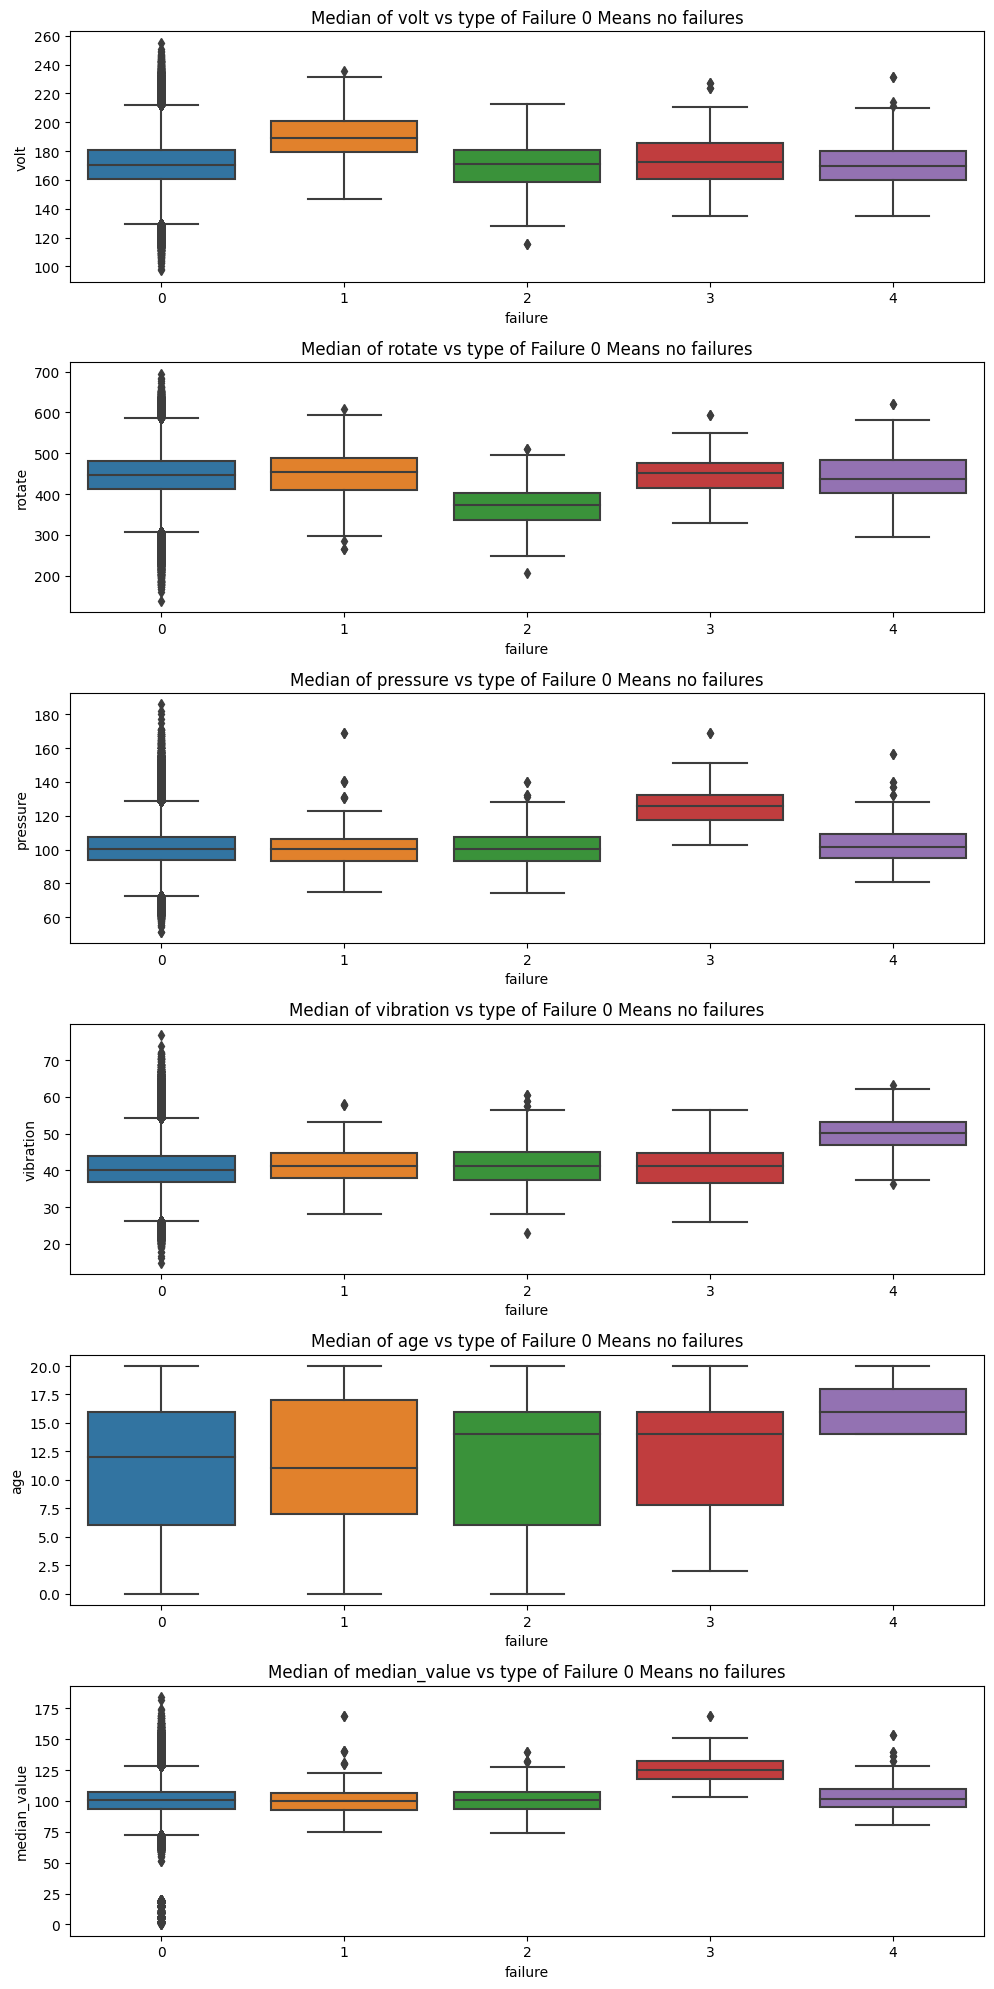

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Add a column for the median of 'volt', 'rotate', 'pressure', 'vibration', 'age'
merged_data['median_value'] = merged_data[['volt', 'rotate', 'pressure', 'vibration', 'age']].median(axis=1)

# Define a list of columns you are interested in
columns = ['volt', 'rotate', 'pressure', 'vibration', 'age', 'median_value']

# Create a subplot for each column
fig, axs = plt.subplots(nrows=len(columns), ncols=1, figsize=(10, 20))

# For each column, create a boxplot split by failure event
for ax, column in zip(axs, columns):
    sns.boxplot(x='failure', y=column, data=merged_data, ax=ax)
    ax.set_title(f'Median of {column} vs type of Failure 0 Means no failures')

plt.tight_layout()
plt.show()


In [ ]:
merged_data = merged_data.drop(['median_value'],axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

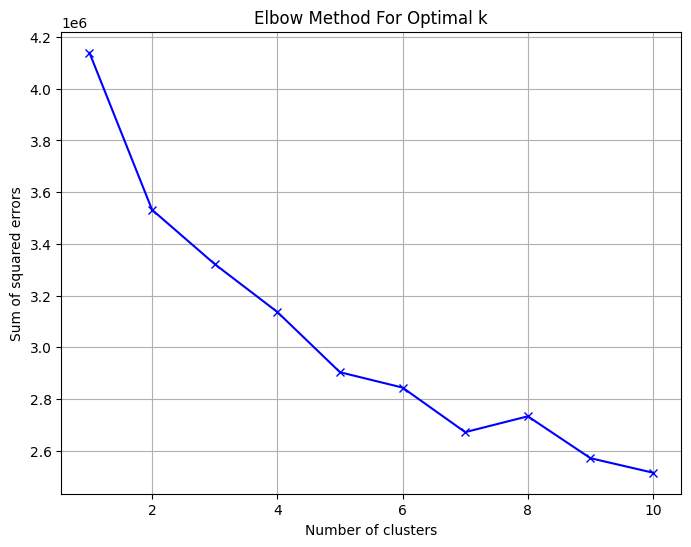

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

sample_df = merged_data.sample(frac=0.3, random_state=42)
# Separate the data into numerical and categorical features
num_features = sample_df.select_dtypes(include=['int64', 'float64']).columns
cat_features = sample_df.select_dtypes(include=['object']).columns

# Preprocessing for numerical data
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder())])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

# Fit and transform the data using the preprocessing pipeline
preprocessed_data = preprocessor.fit_transform(sample_df)

# K-Means and SSE 'elbow' plot

# List to save the SSE for each number of clusters
sse = []

# Range of potential numbers of clusters
K = range(1, 11)

# Fit KMeans for each k
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(preprocessed_data)
    sse.append(kmeans.inertia_)  # inertia is the SSE

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(K, sse, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


In [ ]:
merged_data.columns

Index(['machineID', 'volt', 'rotate', 'pressure', 'vibration', 'failure',
       'model', 'age', 'year', 'month', 'day', 'hour', 'minute', 'second',
       'microsecond', 'nanosecond', 'day_of_year', 'week_of_year',
       'day_of_week', 'weekday', 'quarter', 'is_month_start', 'is_month_end',
       'is_quarter_start', 'is_quarter_end', 'is_year_start', 'is_year_end',
       'is_leap_year'],
      dtype='object')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

sample_df = merged_data.sample(frac=0.3, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


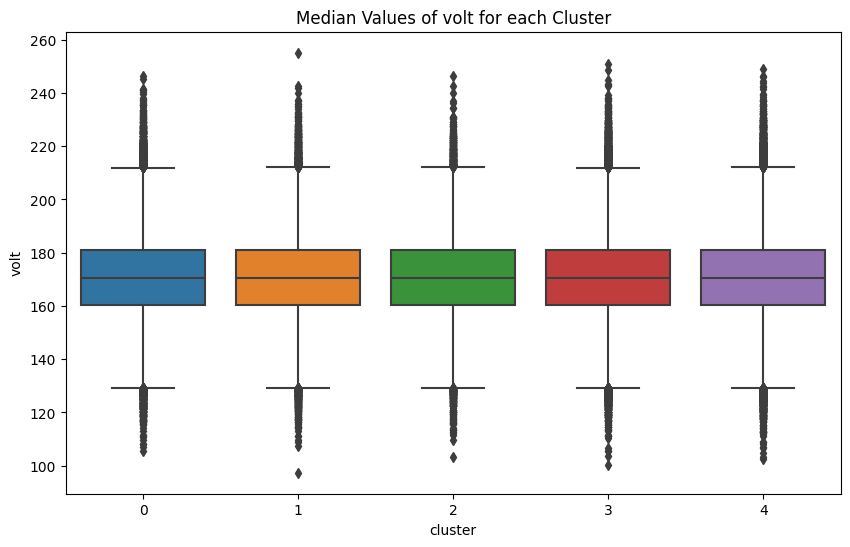

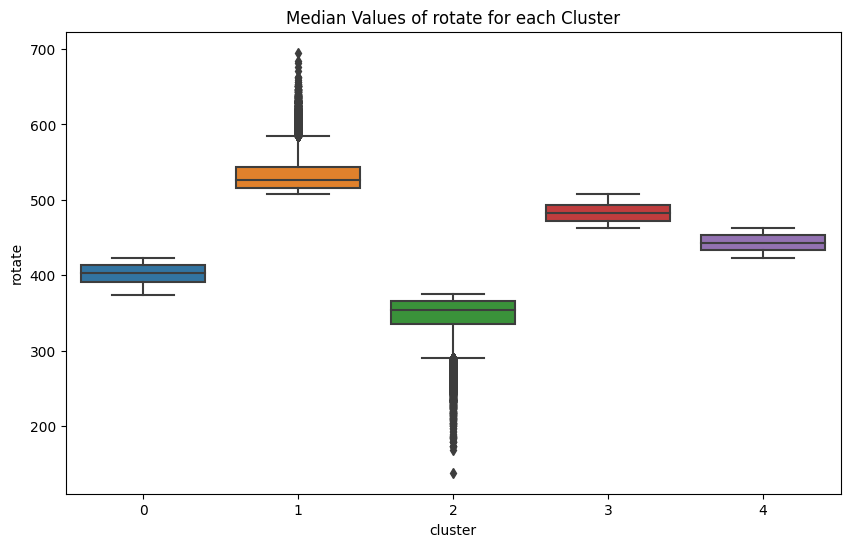

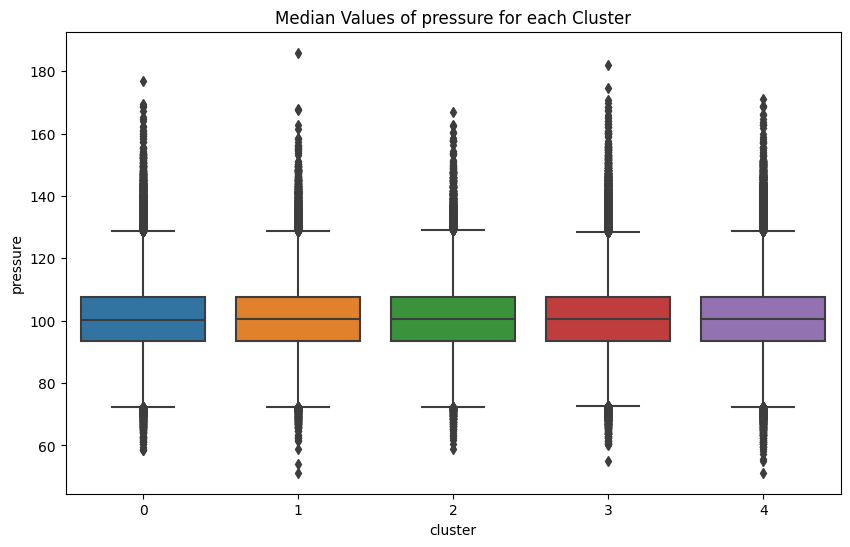

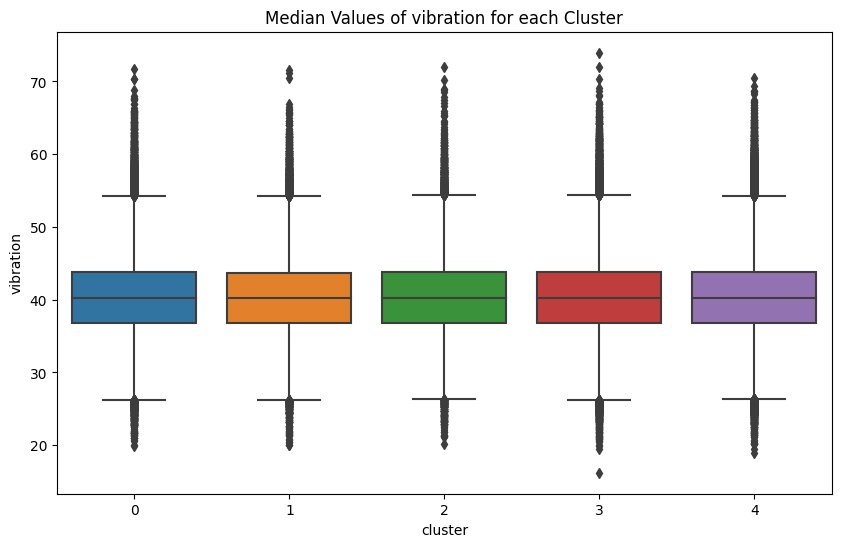

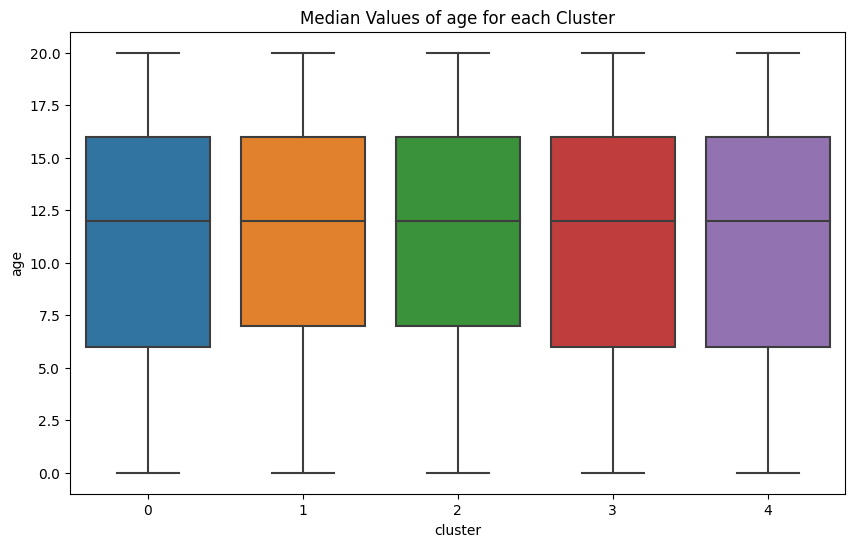

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for clustering
num_cols = ['volt', 'rotate', 'pressure', 'vibration', 'age']
sample_df = merged_data.sample(frac=0.7, random_state=42)
#remove all NaN values from sample_df
sample_df = sample_df.dropna()
# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=0)
sample_df['cluster'] = kmeans.fit_predict(sample_df[num_cols])

# Plotting the median values of each numerical column against each cluster
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=col, data=sample_df)
    plt.title('Median Values of {} for each Cluster'.format(col))
    plt.show()


In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import pickle
y = merged_data['failure']
X = merged_data.drop('failure', axis=1)
# assuming df is your DataFrame
num_features = X.select_dtypes(include=[np.number]).columns
cat_features = X.select_dtypes(exclude=[np.number]).columns

# create the preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# apply transformations to the appropriate columns in the DataFrame
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)])

# Fit the preprocessor
X = preprocessor.fit_transform(X)

# Save preprocessor to a file
with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# First, let's split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Applying SMOTE to our training data
smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Now you can use X_train_smote and y_train_smote for model training


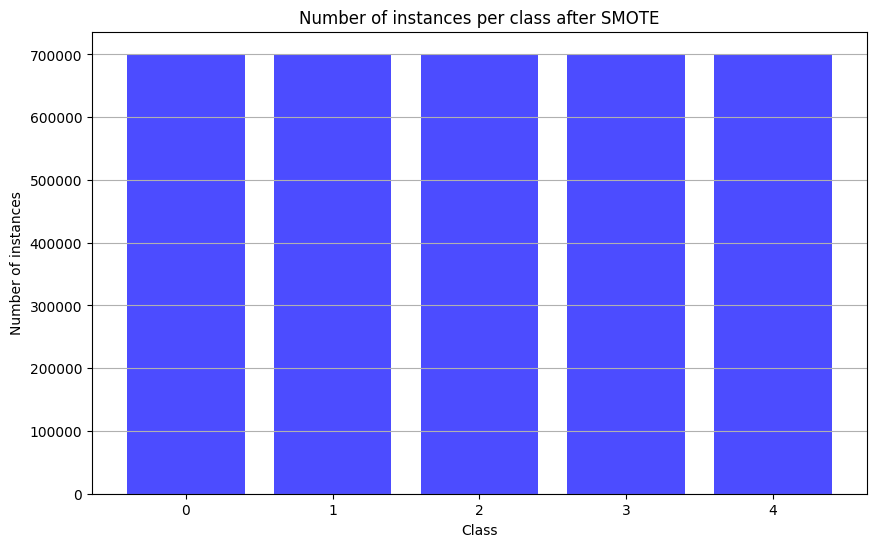

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Count the instances of each class
counter = Counter(y_train_smote)

# Convert the Counter object to a DataFrame for easier plotting
class_counts = pd.DataFrame.from_dict(counter, orient='index').reset_index()

# Rename the columns for clarity
class_counts.columns = ['Class', 'Number of instances']

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(class_counts['Class'], class_counts['Number of instances'], color='blue', alpha=0.7)
plt.xlabel('Class')
plt.ylabel('Number of instances')
plt.title('Number of instances per class after SMOTE')
plt.xticks(class_counts['Class'])
plt.grid(axis='y')
plt.show()
